# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18805693,
            "total_supply": 18805693,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 49978.0,
                    "volume_24h": 43007607563,
                    "market_cap": 940522458834,
                    "percentage_change_1h": 0.456953556083719,
                    "percentage_change_24h": 1.94184654043826,
                    "percentage_change_7d": 1.8240699654526,
                    "percent_change_1h": 0.456953556083719,
                    "percent_change_24h": 1.94184654043826,
                    "percent_change_7d": 1.8240699654526
                },
                "CAD": {
                    "price": 62597.445,
                    "volume_24h": 53867028472.6575,
                    "marke

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]



# Fetch current ETH price
# YOUR CODE HERE!
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59973.60
The current value of your 5.3 ETH is $20922.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2021-07-12", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = api.get_barset(tickers, timeframe, start=today, end=today,).df

df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                      SPY                  \
             open     high    low   close   volume    open    high     low   
2021-07-12  115.8  115.805  115.6  115.63  3184908  435.42  437.35  434.97   

                              
             close    volume  
2021-07-12  437.08  42031814

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.63
Current SPY closing price: $437.08


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21854.00
The current value of your 200 AGG shares is $23126.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value


# Consolidate financial assets data
# YOUR CODE HERE!
data = {'amount':[total_crypto, total_shares_value]} 
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,80895.615
shares,44980.000


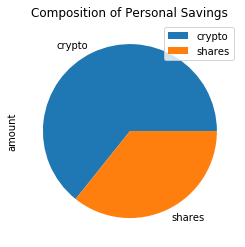

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares_value

# Validate saving health
# YOUR CODE HERE!
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

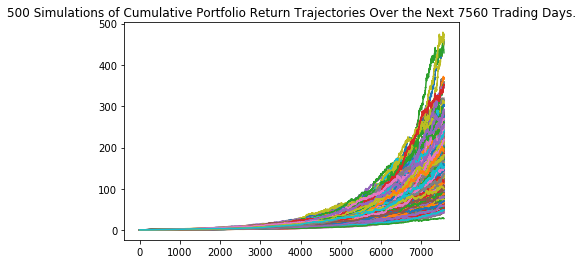

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

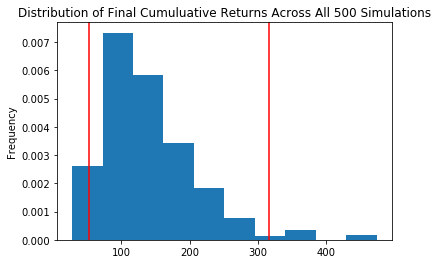

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean            140.528648
std              68.407503
min              28.540152
25%              94.755008
50%             125.846119
75%             170.475329
max             473.228246
95% CI Lower     53.139249
95% CI Upper    315.750907
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1062784.99 and $6315018.15


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1594177.48 and $9472527.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2020-12-07  117.76  117.8262  117.6900  117.75  4689469          NaN  369.02   
2020-12-08  117.88  117.9597  117.7500  117.77  3587353     0.000170  367.72   
2020-12-09  117.73  117.7800  117.5172  117.62  4720359    -0.001274  370.88   
2020-12-10  117.74  117.9300  117.6900  117.88  4694024     0.002211  365.37   
2020-12-11  118.01  118.0900  117.9500  118.03  5537449     0.001272  364.90   

                                                               
                high     low     close    volume daily_return  
2020-12-07  369.6200  367.72  369.1200  40456544          NaN  
2020-12-08  370.7800  367.67  370.1599  32702217     0.002817  
2020-12-09  371.0500  365.95  366.8900  60700254    -0.008834  
2020-12-10  367.8600  364.43  366.7200  47851654    -0.000463  
2020-12-11  366.7402  363.26  366.2800  47917103    -0.001200

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004482,1.003137,0.997372,0.999090,0.994399,1.000685,1.001498,1.008686,0.997345,1.012097,...,0.989422,0.999081,1.002998,0.998684,1.000143,1.001958,1.008262,1.001927,0.996155,1.003165
2,1.002372,0.998517,0.991313,0.998050,0.995127,1.002730,0.998712,1.005449,0.993322,1.016110,...,0.987560,0.991227,0.997778,1.003848,0.990244,1.009220,1.003245,1.005855,0.994157,1.002732
3,0.997455,0.995939,1.001021,0.999515,0.995510,1.004032,1.006641,1.008591,0.990851,1.020323,...,0.984616,0.987592,0.992648,1.005952,0.984250,1.004245,0.993365,1.008273,0.996317,1.012581
4,0.993533,0.998047,0.999890,0.999926,0.995052,1.001781,0.999653,1.014103,0.993035,1.021575,...,0.982919,0.983313,0.998521,1.001256,0.995118,1.007907,1.001049,1.009441,0.981739,1.008962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.811365,2.265012,2.717337,1.809984,2.762504,1.948117,2.443886,2.243598,1.643128,1.649627,...,3.468423,1.984615,1.987391,1.547397,2.306794,1.970197,1.820719,1.669131,1.739518,2.610890
1257,1.808733,2.287943,2.738333,1.804573,2.782986,1.942646,2.419971,2.243312,1.652417,1.662684,...,3.440512,1.977785,1.992929,1.551719,2.296073,1.968500,1.822679,1.666044,1.736829,2.616917
1258,1.797363,2.302209,2.744687,1.824491,2.783550,1.959400,2.415111,2.245819,1.662691,1.680109,...,3.439638,1.954559,1.996114,1.556357,2.295554,1.962144,1.819690,1.677926,1.748111,2.608171
1259,1.806514,2.298716,2.733155,1.829796,2.800253,1.959278,2.417101,2.240022,1.652663,1.669664,...,3.465868,1.973491,2.002096,1.560651,2.286136,1.959173,1.807693,1.676212,1.745932,2.600675


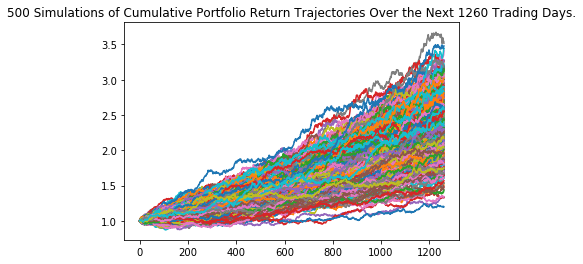

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_even_dist_five.plot_simulation()

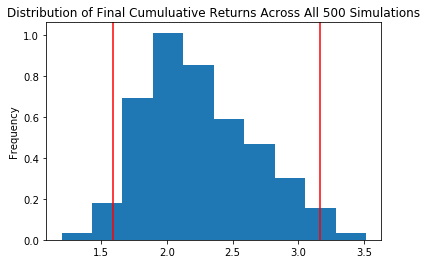

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_even_dist_five.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_five)

count           500.000000
mean              2.251135
std               0.421146
min               1.197908
25%               1.942017
50%               2.177684
75%               2.523791
max               3.515849
95% CI Lower      1.586615
95% CI Upper      3.166874
Name: 1260, dtype: float64


In [32]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $40,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_five[8]*40000,2)
ci_upper_five = round(even_tbl_five[9]*40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $63464.61 and $126674.95


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                       SPY  \
              open      high       low   close   volume daily_return    open   
2020-12-07  117.76  117.8262  117.6900  117.75  4689469          NaN  369.02   
2020-12-08  117.88  117.9597  117.7500  117.77  3587353     0.000170  367.72   
2020-12-09  117.73  117.7800  117.5172  117.62  4720359    -0.001274  370.88   
2020-12-10  117.74  117.9300  117.6900  117.88  4694024     0.002211  365.37   
2020-12-11  118.01  118.0900  117.9500  118.03  5537449     0.001272  364.90   

                                                               
                high     low     close    volume daily_return  
2020-12-07  369.6200  367.72  369.1200  40456544          NaN  
2020-12-08  370.7800  367.67  370.1599  32702217     0.002817  
2020-12-09  371.0500  365.95  366.8900  60700254    -0.008834  
2020-12-10  367.8600  364.43  366.7200  47851654    -0.000463  
2020-12-11  366.7402  363.26  366.2800  47917103    -0.001200

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006384,0.998017,0.990444,1.000051,1.002218,0.994006,0.994389,0.997184,1.000060,0.997578,...,0.998200,0.999283,1.003940,1.006561,0.996847,0.996845,0.993763,1.006918,1.006501,1.001155
2,1.003712,0.999807,0.991315,0.994292,0.997863,0.990445,0.997104,1.003208,1.004729,0.994387,...,0.997999,1.000378,1.006485,1.002910,0.998885,0.993913,0.992998,1.004091,1.008084,0.999962
3,0.992326,1.000279,0.987207,0.988626,1.001256,0.988036,0.993841,1.005500,1.005772,0.991705,...,1.013078,1.001528,1.007950,1.003114,1.004932,0.996964,0.996119,0.999279,1.004921,0.995969
4,0.988223,1.009965,0.989333,0.996550,1.001145,0.997636,1.003428,1.001915,1.005334,0.998921,...,1.024829,1.004241,1.012445,0.996196,1.005640,0.999389,1.000251,0.995242,1.000910,1.002156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.032937,5.448215,4.819637,3.076106,5.893889,3.682471,3.143351,6.125776,6.938798,5.158339,...,4.466468,3.071610,6.562023,4.267947,4.211425,6.277191,5.116267,4.514187,4.353785,5.138656
2517,3.065103,5.444317,4.854398,3.076482,5.804572,3.682635,3.179650,6.130373,6.972928,5.177488,...,4.456782,3.078898,6.591479,4.275990,4.193388,6.284325,5.130934,4.531435,4.392129,5.112880
2518,3.083811,5.412303,4.868475,3.106073,5.866942,3.682276,3.200786,6.128176,7.001299,5.193077,...,4.489863,3.073943,6.618481,4.296667,4.183320,6.235563,5.112669,4.506545,4.373033,5.115736
2519,3.058827,5.434224,4.853679,3.094561,5.804570,3.672823,3.228339,6.170137,6.993999,5.172866,...,4.499003,3.089125,6.661974,4.292866,4.239113,6.262393,5.162904,4.495150,4.378473,5.110524


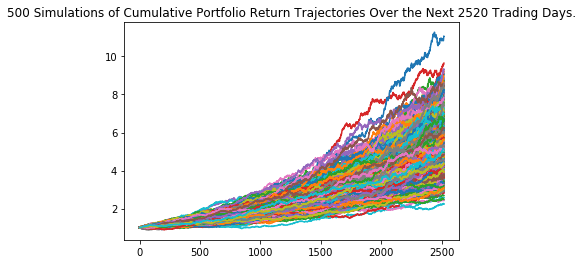

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_even_dist_ten.plot_simulation()

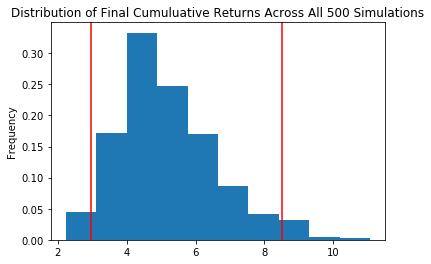

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)

count           500.000000
mean              5.179792
std               1.399701
min               2.236836
25%               4.213198
50%               4.937304
75%               6.006580
max              11.065808
95% CI Lower      2.961295
95% CI Upper      8.510579
Name: 2520, dtype: float64


In [39]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $177677.67 and $510634.71
